In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

## 0. Thực hiện rời rạc hóa dữ liệu

In [4]:
df = np.random.rand(1000)
df = pd.qcut(df,[0, 0.1, 0.5, 0.9, 1.])
df.value_counts()

(0.0012000000000000001, 0.0965]    100
(0.0965, 0.488]                    400
(0.488, 0.895]                     400
(0.895, 0.998]                     100
dtype: int64

## 1. Thực hành xử lý trên bộ dữ liệu FoodPrice_in_Turkey

### 1.1 Đọc và xem mô tả dữ liệu

In [6]:
df = pd.read_csv('Data/FoodPrice_in_Turkey.csv', encoding= 'ISO-8859-1')
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [8]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


Dữ liệu không có gì bất thường

### 1.2 Xử lý giá trị thiếu

In [11]:
df[df.isna().any(axis = 1)]

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price


Không có dòng nào chứa dữ liệu thiếu

### 1.3 Xử lý dữ liệu ngoại lai

<AxesSubplot:xlabel='Price'>

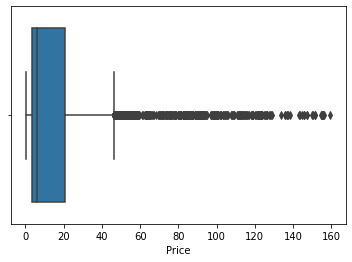

In [15]:
sns.boxplot(x = df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

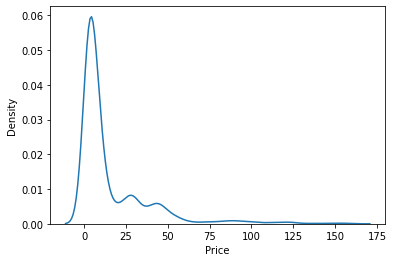

In [16]:
sns.kdeplot(x = df['Price'])

- Dữ liệu Price không tuân theo phân phối chuẩn, bị lệch phải khá nhiều
    - Cần thực hiện loại bỏ outlier

### Lọai bỏ outlier

In [17]:
Q1 = df['Price'].quantile(q = 0.25)
Q3 = df['Price'].quantile(q = 0.75)
IQR = Q3 - Q1

In [19]:
df = df[(~(df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR))]

<AxesSubplot:xlabel='Price'>

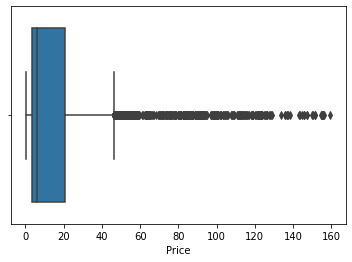

In [21]:
sns.boxplot(x = df['Price'])

- Dựa theo IQR thì Price không có outlier
- Ta sẽ thử dùng Z-Score

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(df['Price']))
df = df[z < 3]

<AxesSubplot:xlabel='Price'>

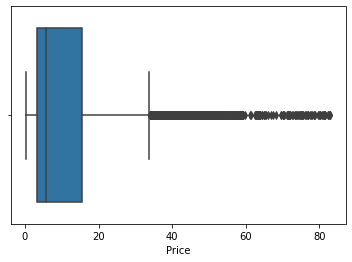

In [29]:
sns.boxplot(x = df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

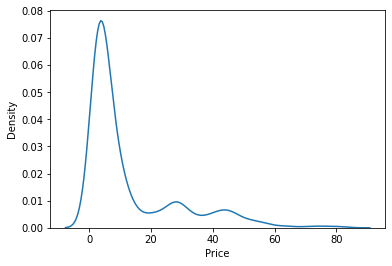

In [31]:
sns.kdeplot(x = df['Price'])

### 1.3 Chuẩn hóa dữ liệu

In [43]:
scale = MinMaxScaler()
df_s = scale.fit_transform(df[['Price']])

<AxesSubplot:>

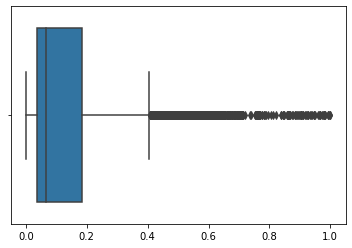

In [40]:
sns.boxplot(x = df_s)

### 1.4 Mã hóa dữ liệu

In [50]:
# mã hóa cột ProductName
encoder = OneHotEncoder()

encoded_productName = encoder.fit_transform(np.asarray(df['ProductName']).reshape(-1,1))
encoded_productName.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
pd.get_dummies(df['ProductName'])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.5 Rời rạc hóa dữ liệu

In [54]:
cats = pd.cut(df['Price'], 5)
cats.value_counts()

(0.171, 16.794]     5398
(16.794, 33.335]     874
(33.335, 49.875]     629
(49.875, 66.416]     197
(66.416, 82.956]      63
Name: Price, dtype: int64

In [55]:
cats = pd.qcut(df['Price'], 5)
cats.value_counts()

(0.253, 2.78]       1434
(4.551, 7.553]      1432
(7.553, 25.327]     1432
(25.327, 82.956]    1432
(2.78, 4.551]       1431
Name: Price, dtype: int64